### Event Distribution of Mice with Time

In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
import paths
from preprocessing import read_csv_clean

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M1.CSV


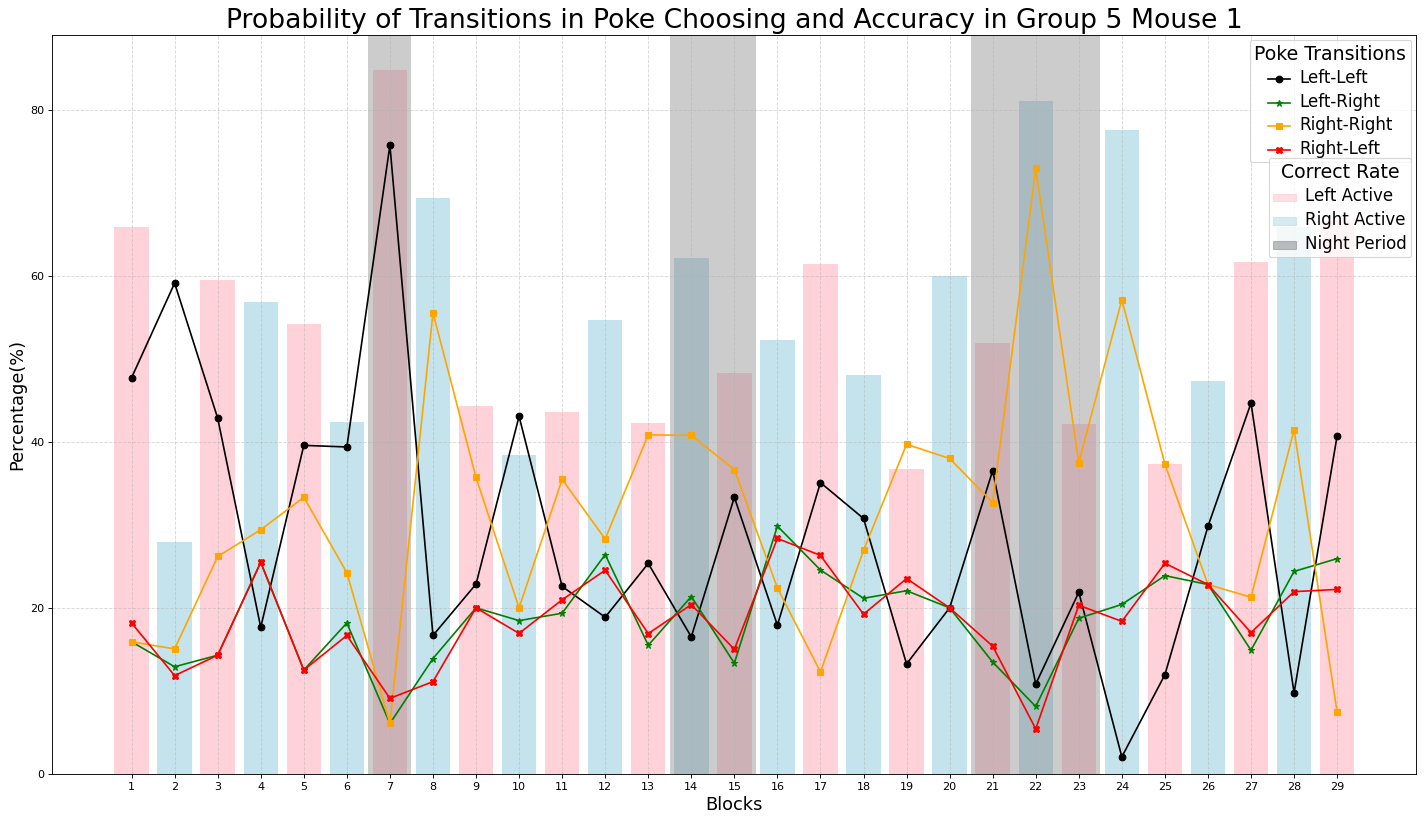

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M2.CSV


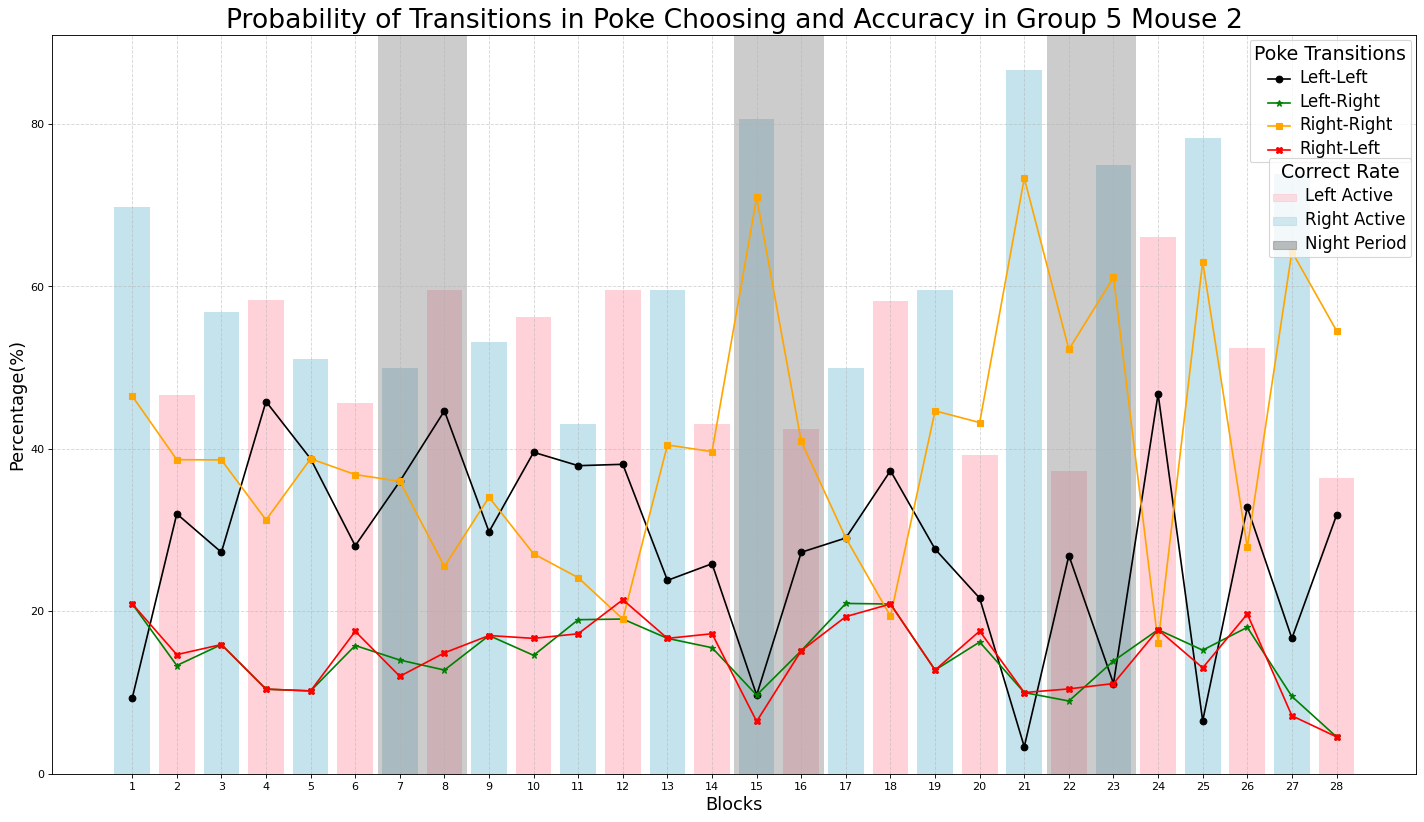

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M3.CSV


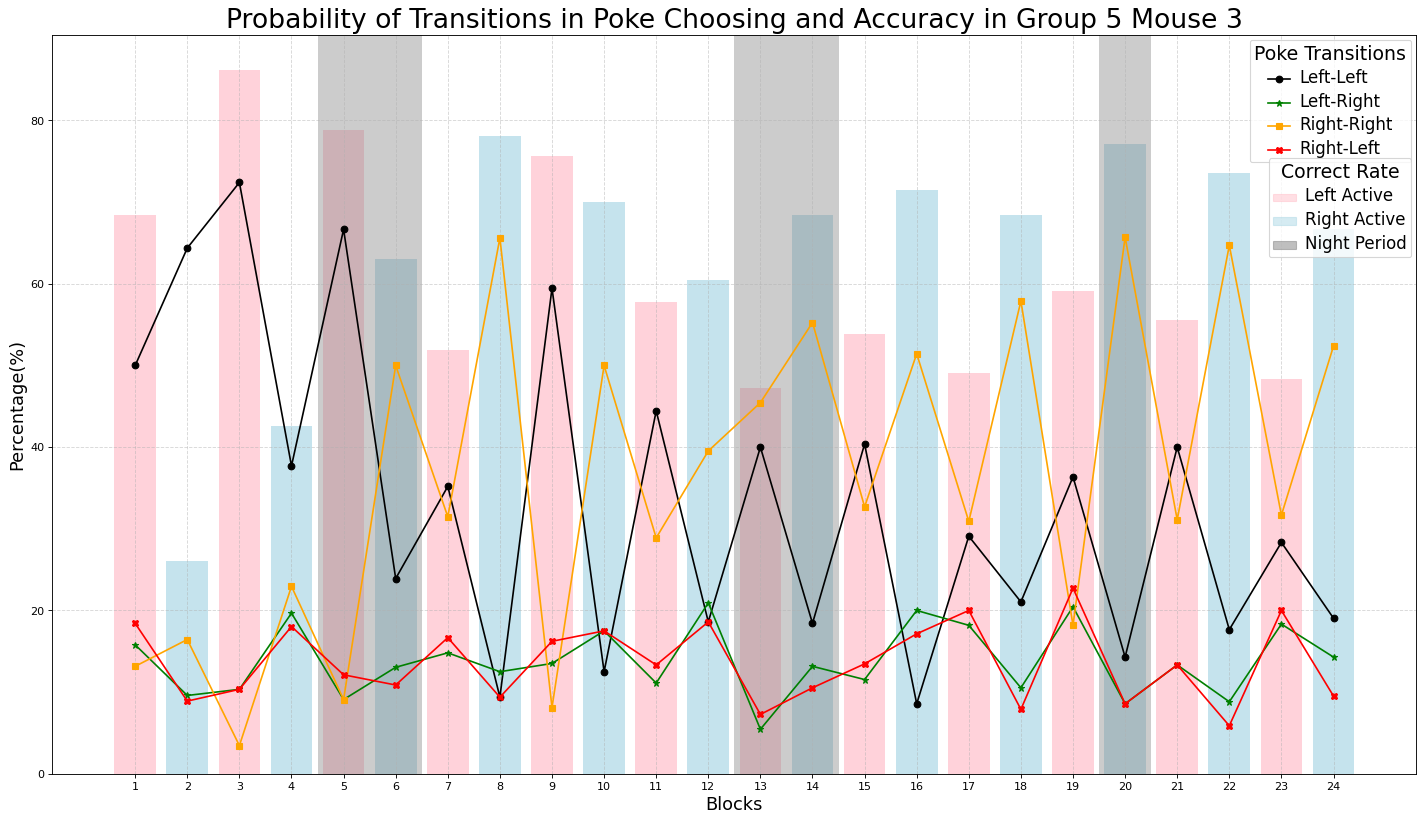

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M4.CSV


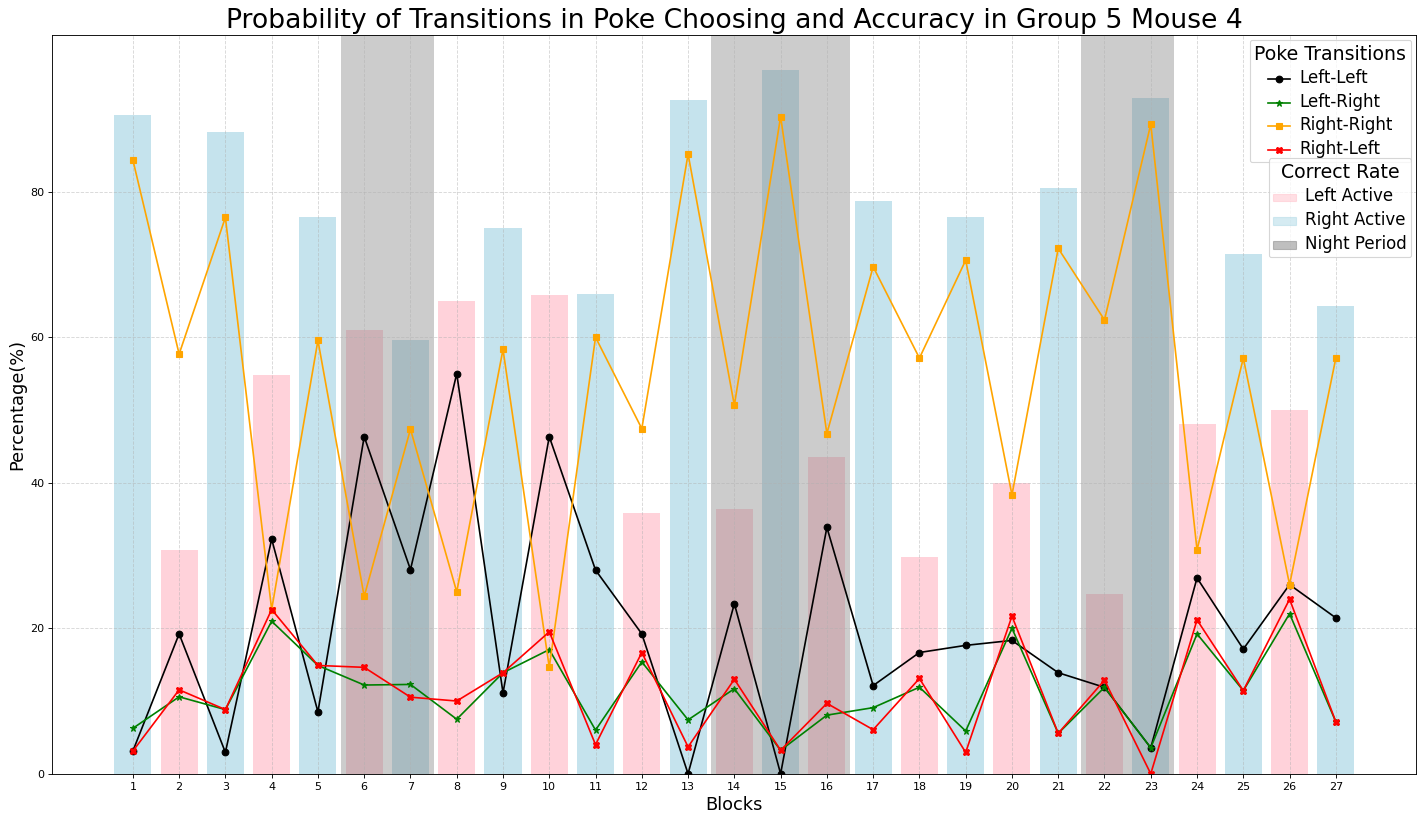

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B7M2.CSV


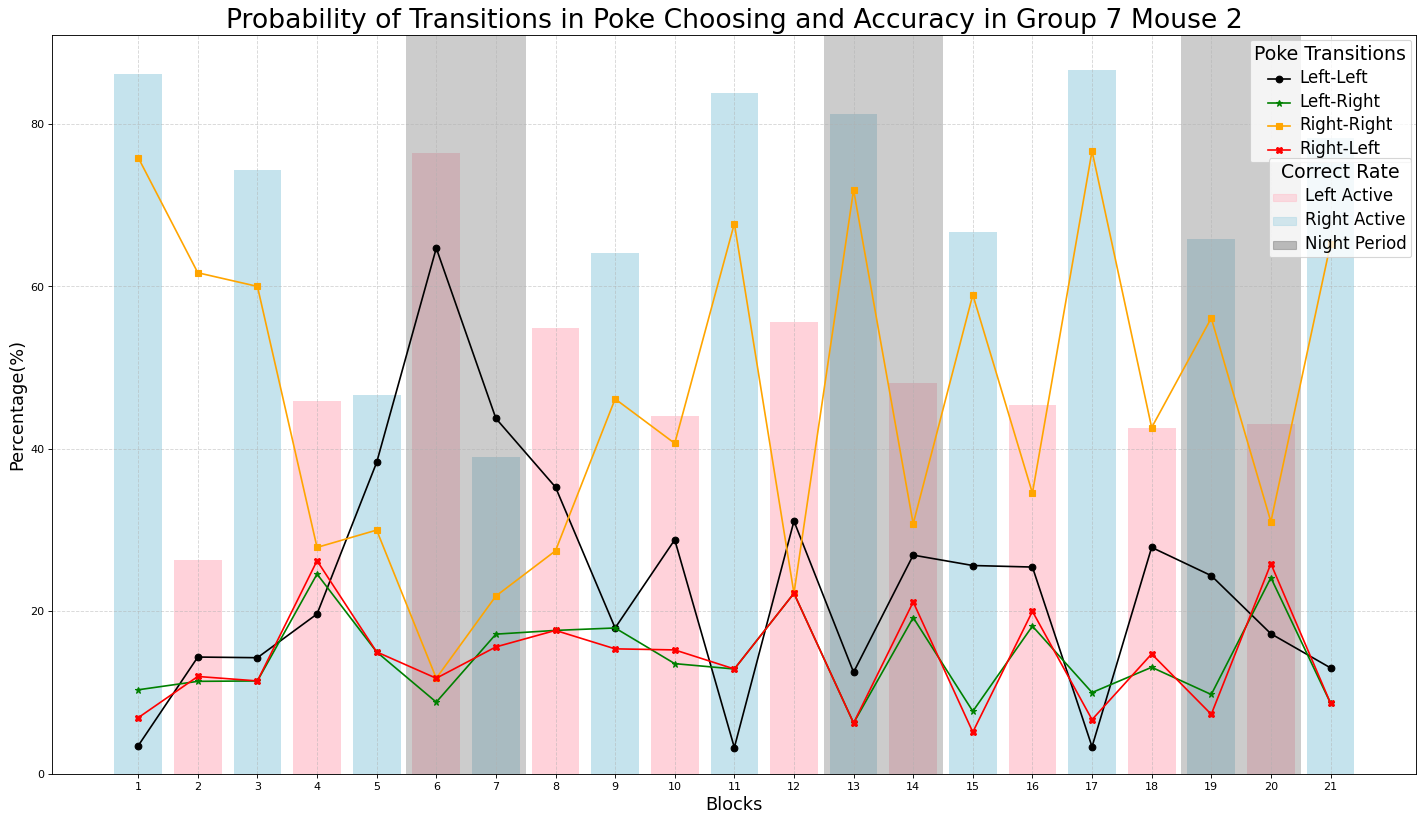

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B7M4.CSV


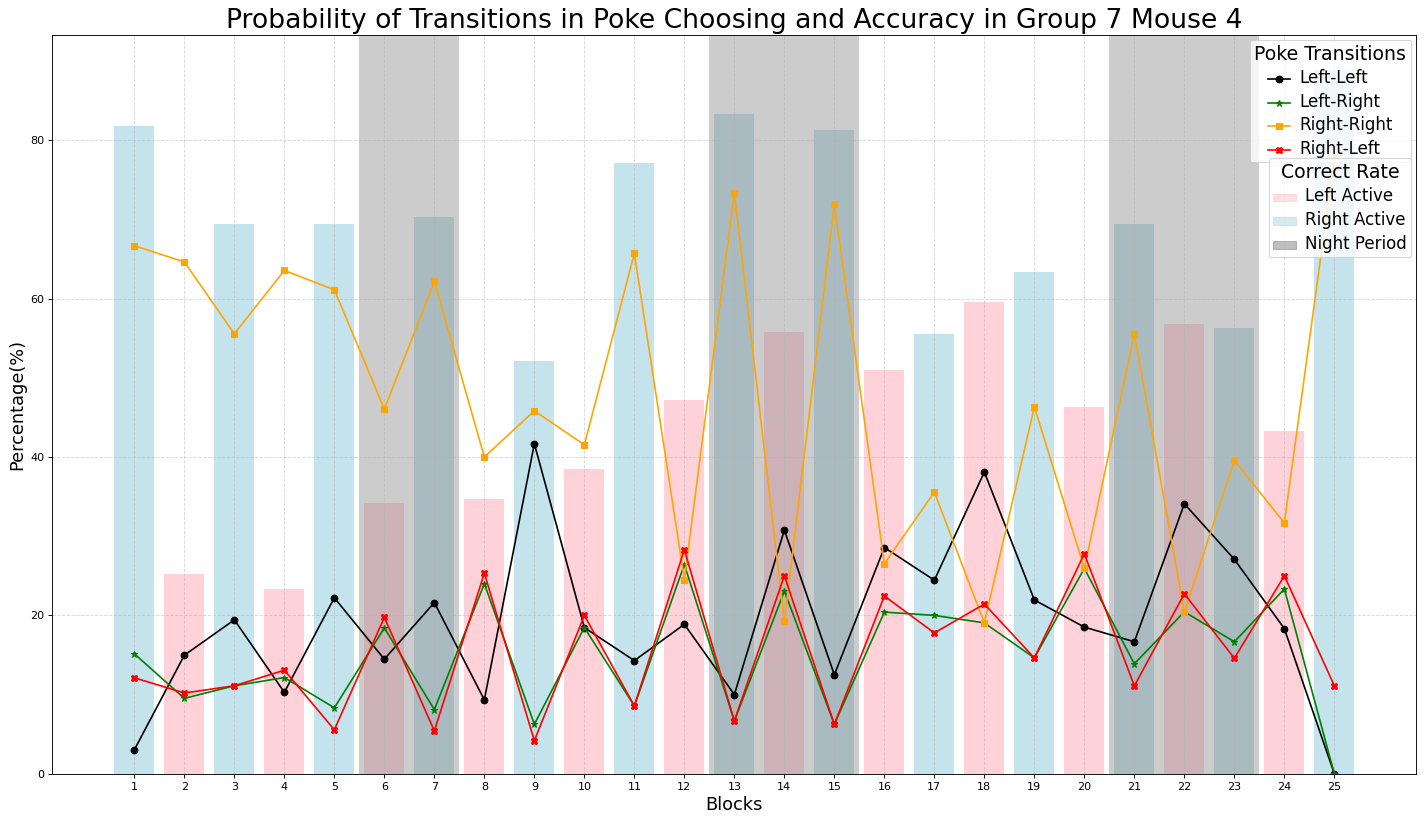

In [2]:
ctrl_scores = []

for path in paths.contigency_flip_ctrl:
    print(path)
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path)
    # diff, left_start = dit.get_difference_key(data_stats)
    # ctrl_scores.append(dit.learning_score_grad(diff, left_start))
    acc, grad = dit.block_cumulative_acc(blocks, normalize=True, grad=True)
    ctrl_scores.append(sum(grad))

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M1.CSV


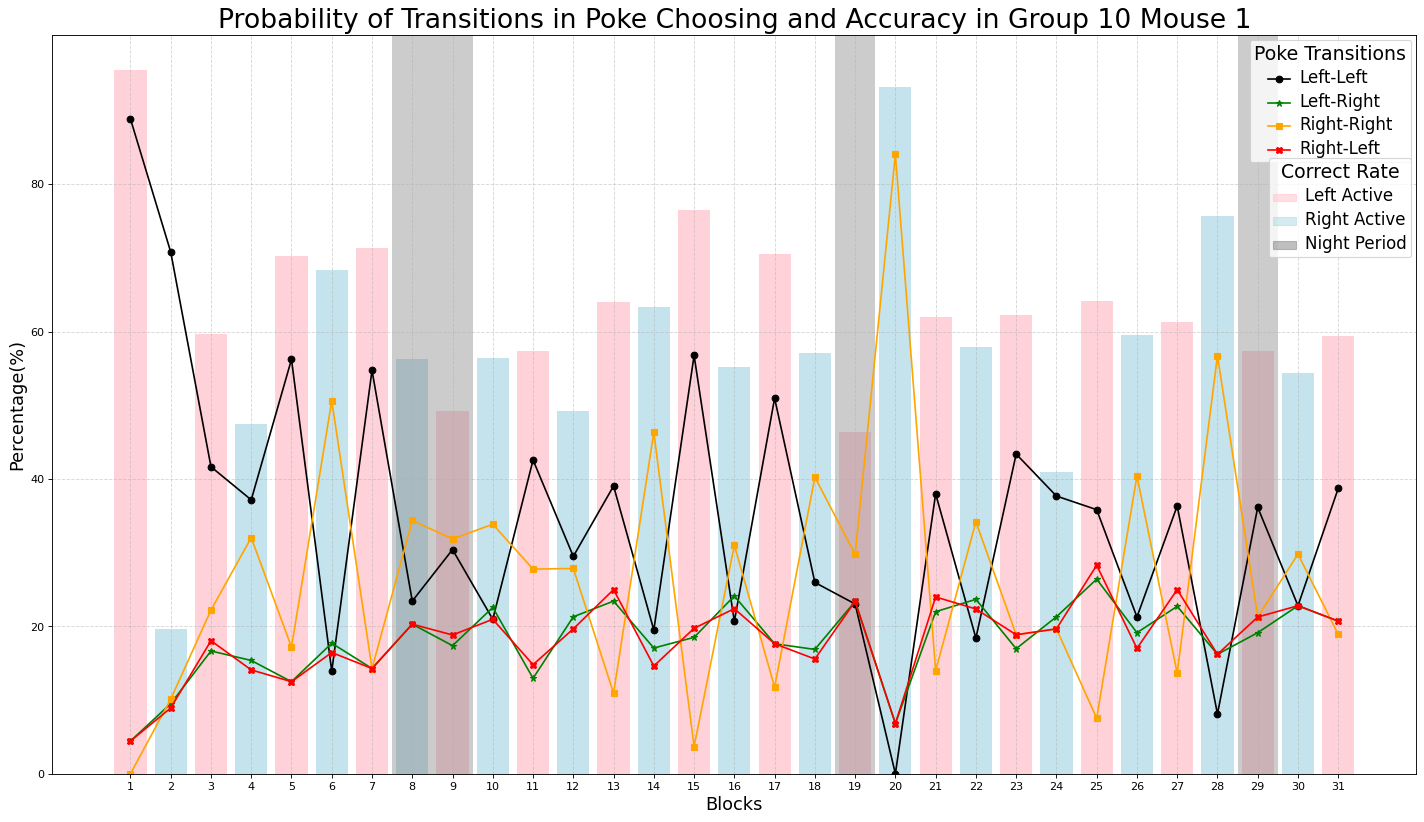

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M2.CSV


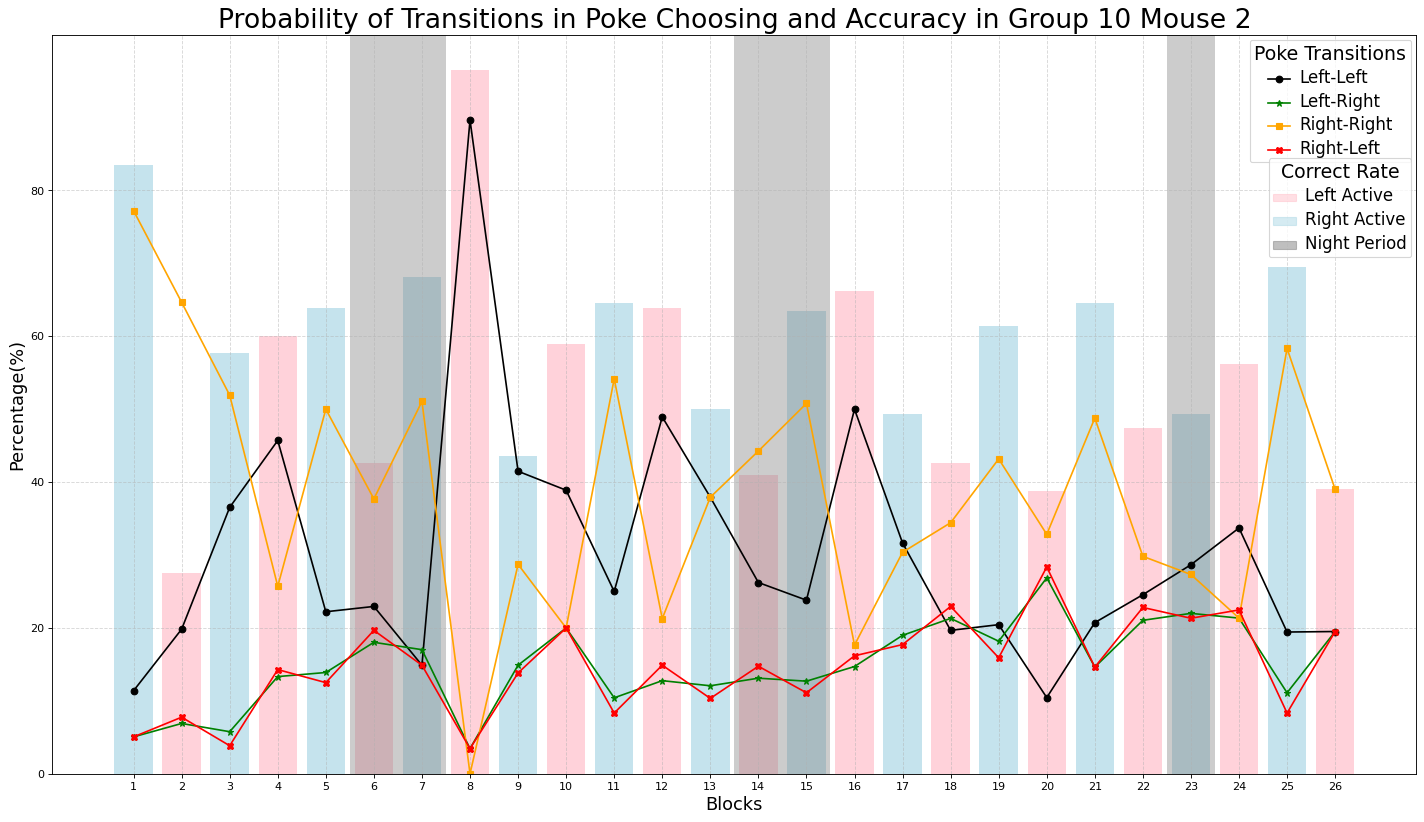

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M3.CSV


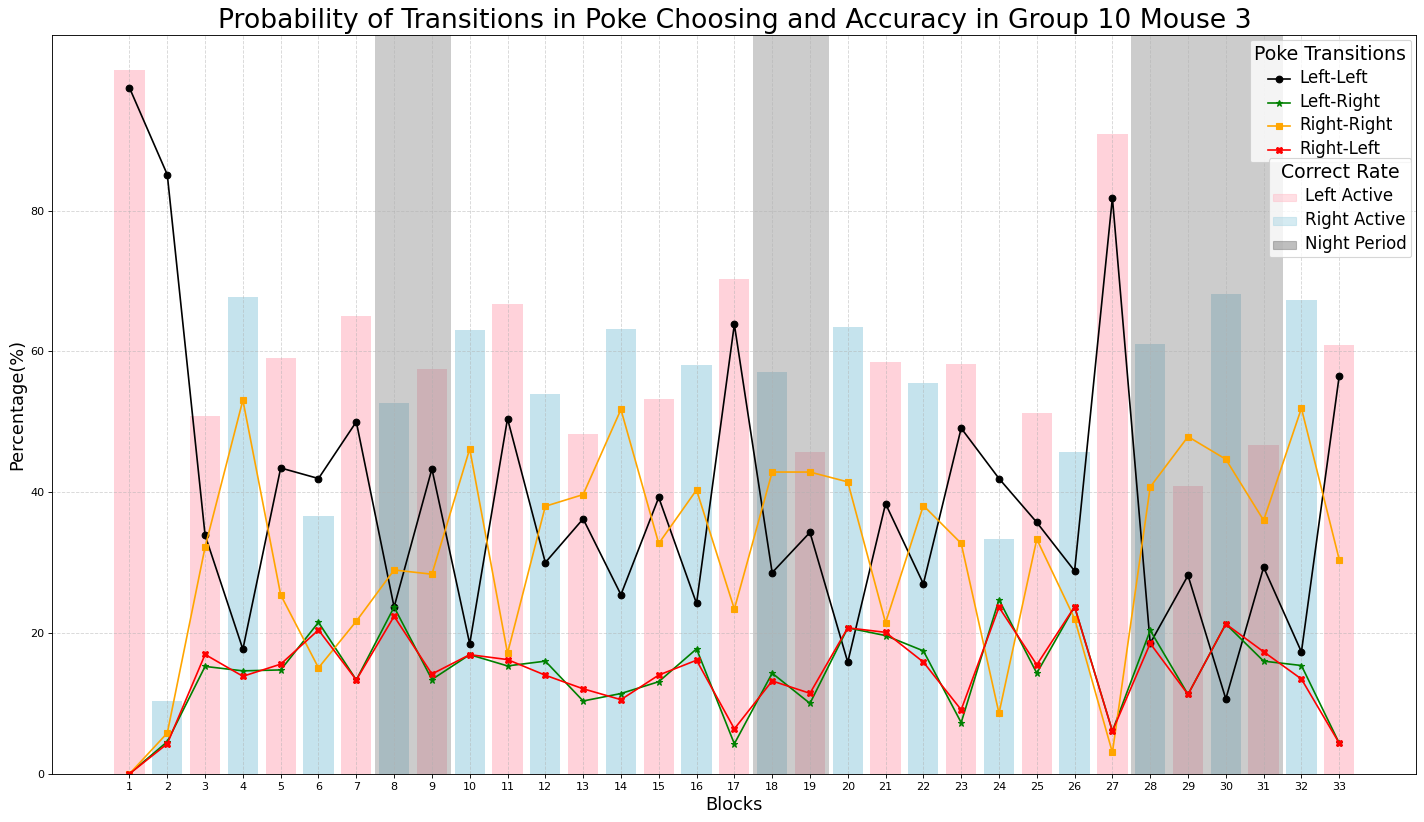

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M4.CSV


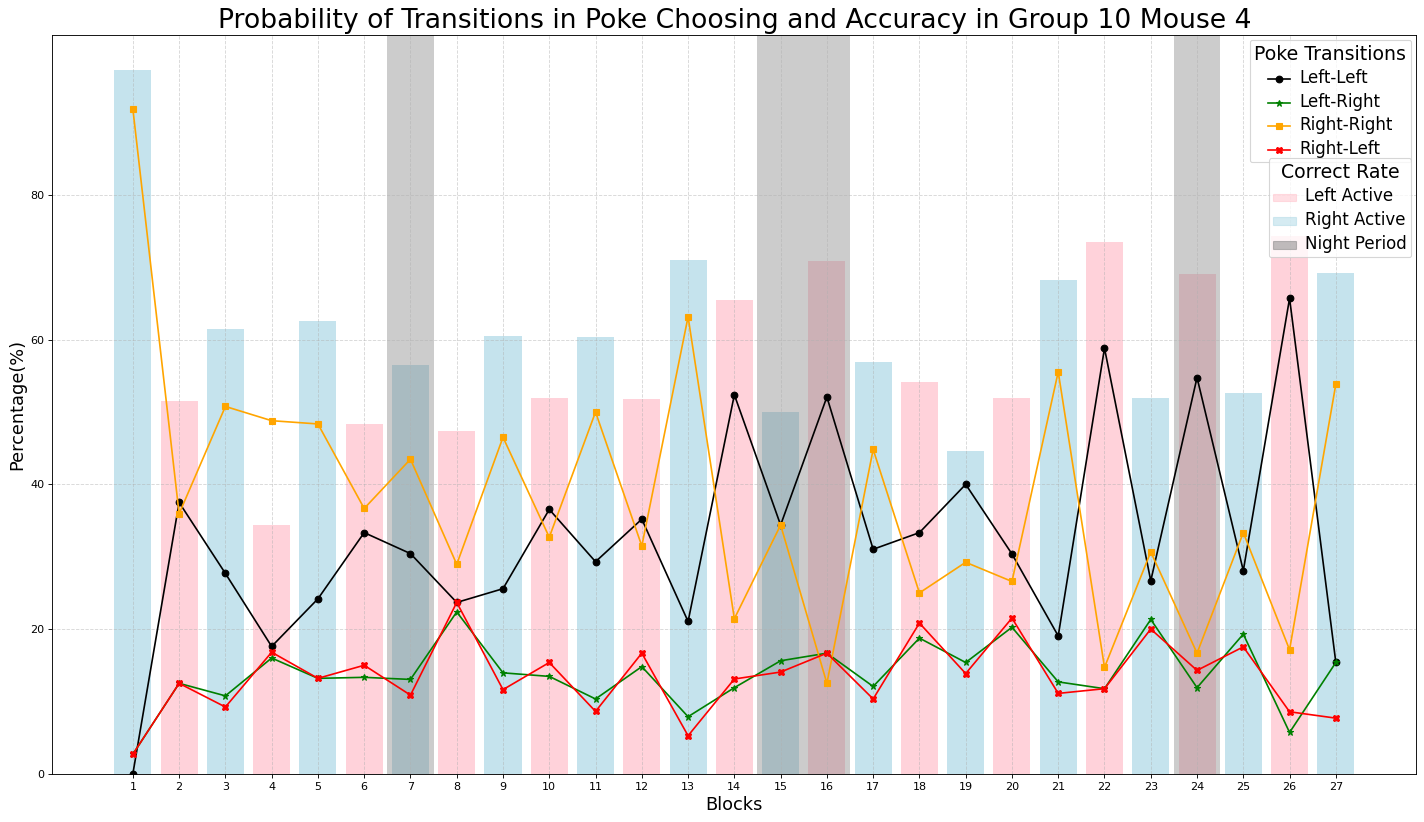

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M5.CSV


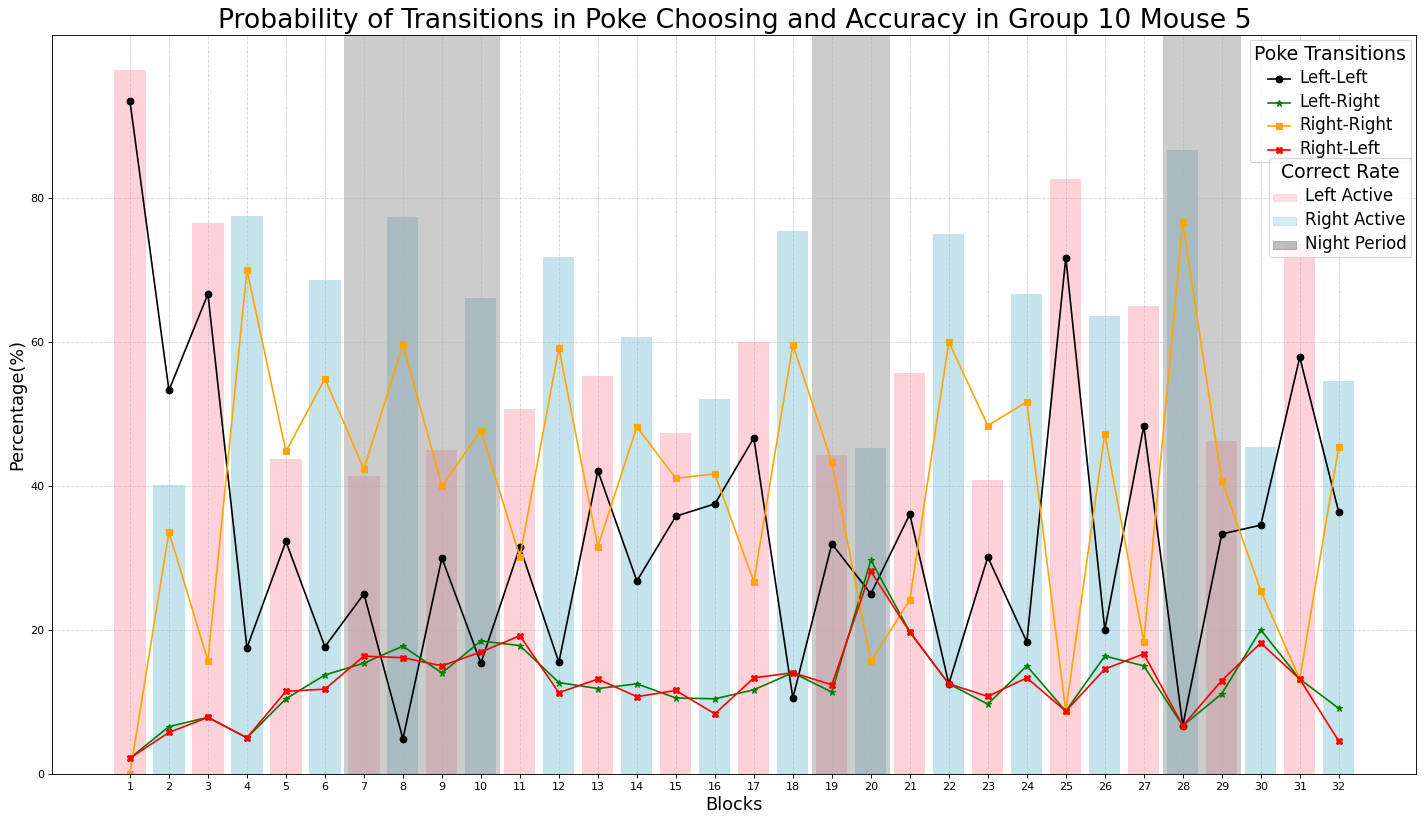

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M1.CSV


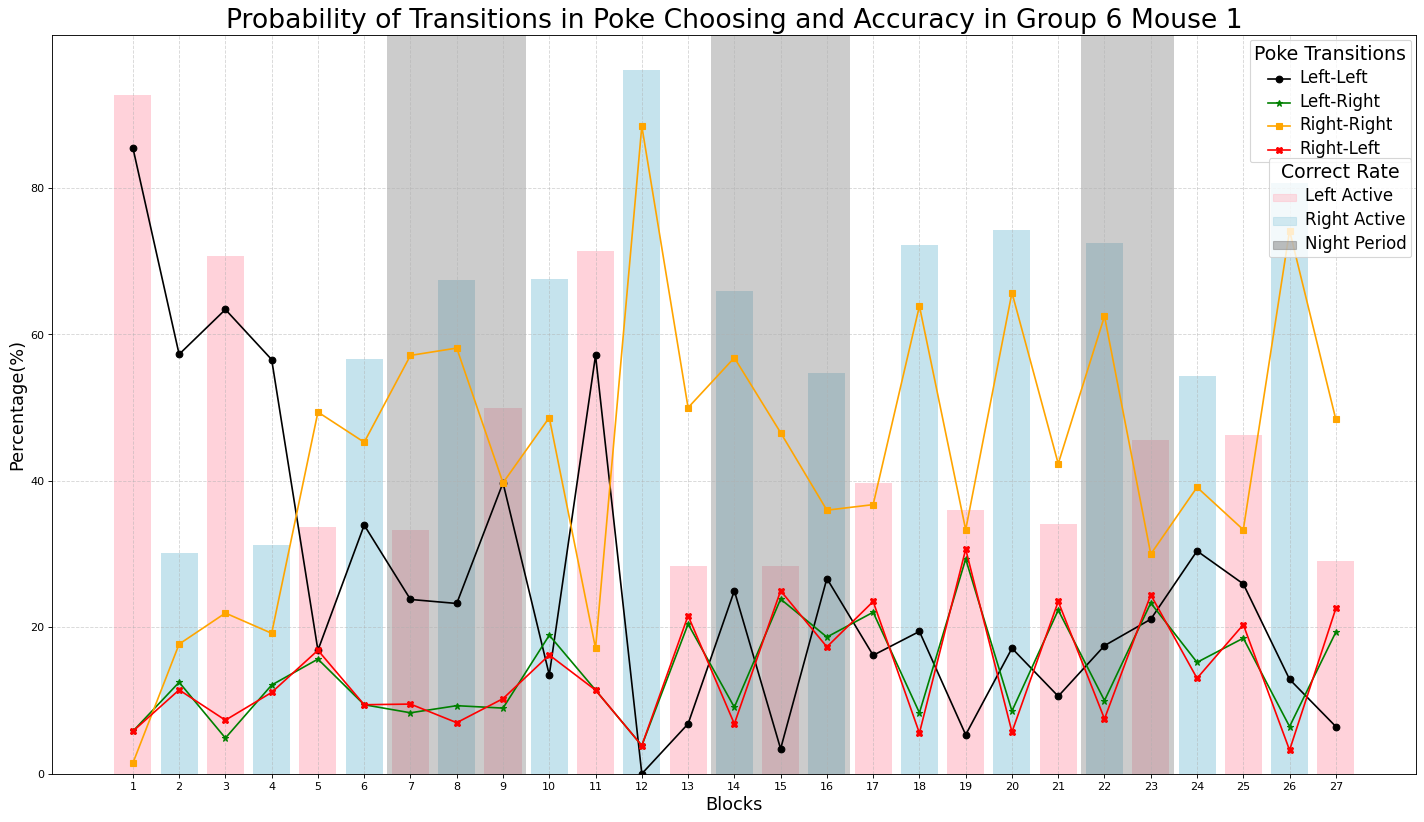

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M2.CSV


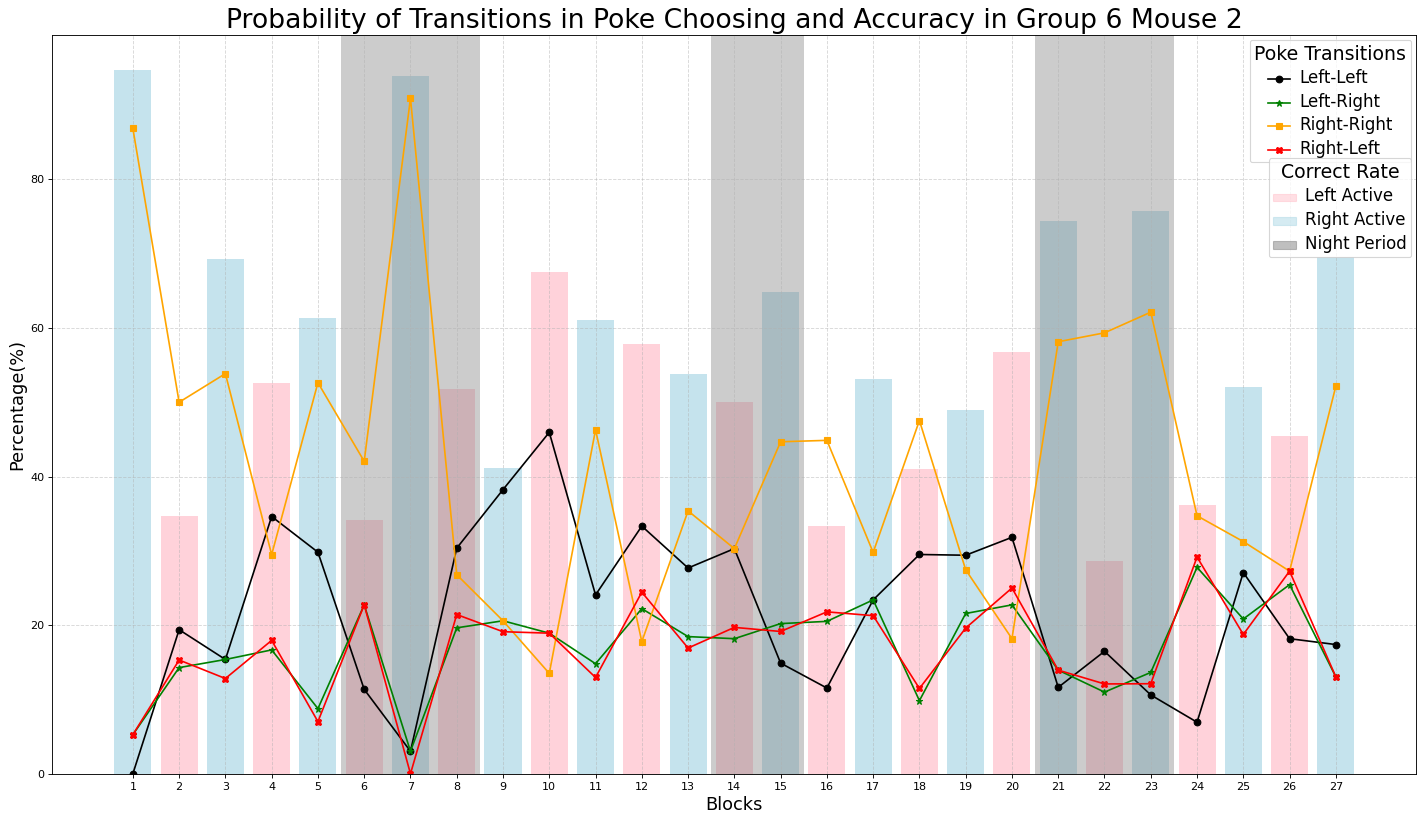

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M3.CSV


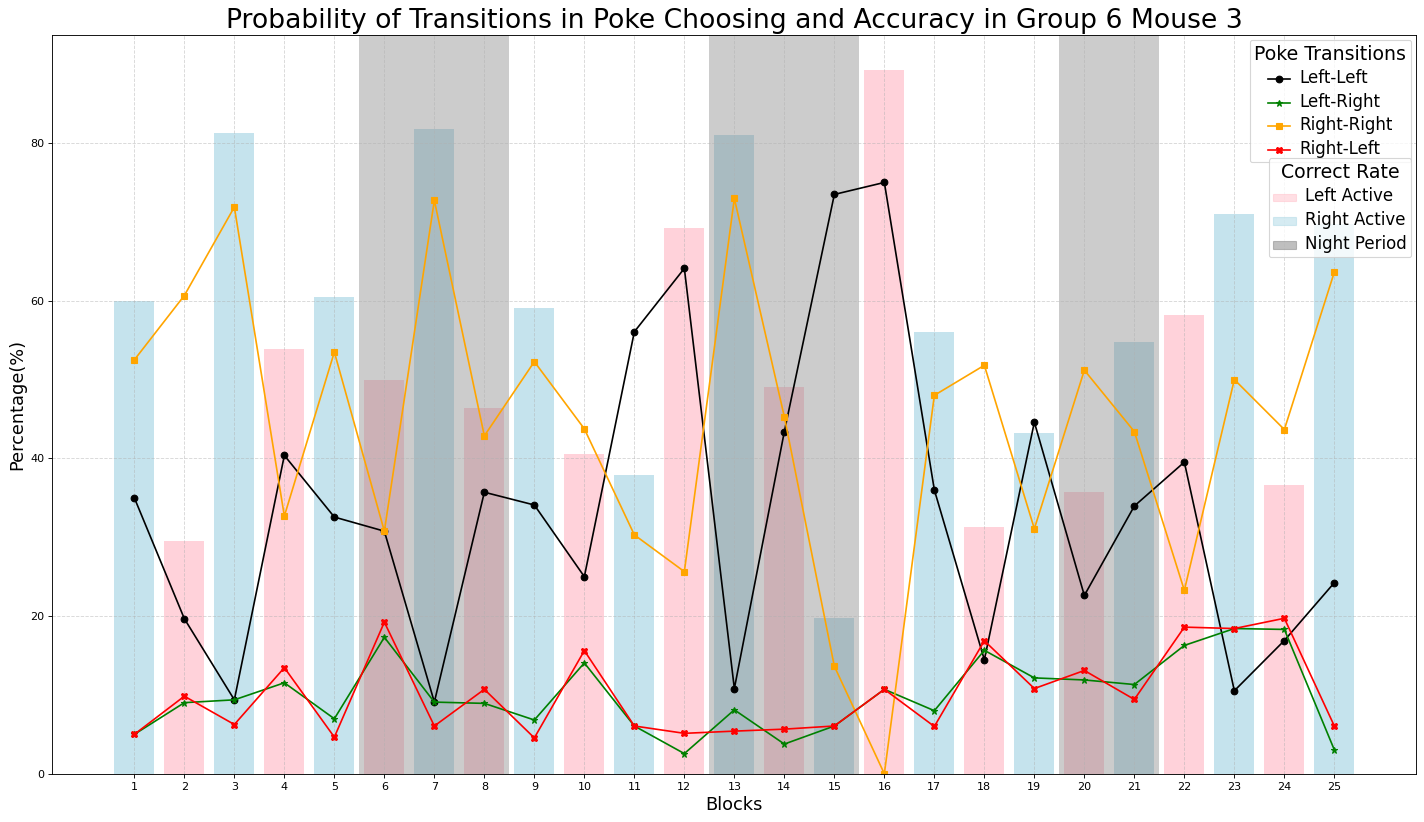

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M4.CSV


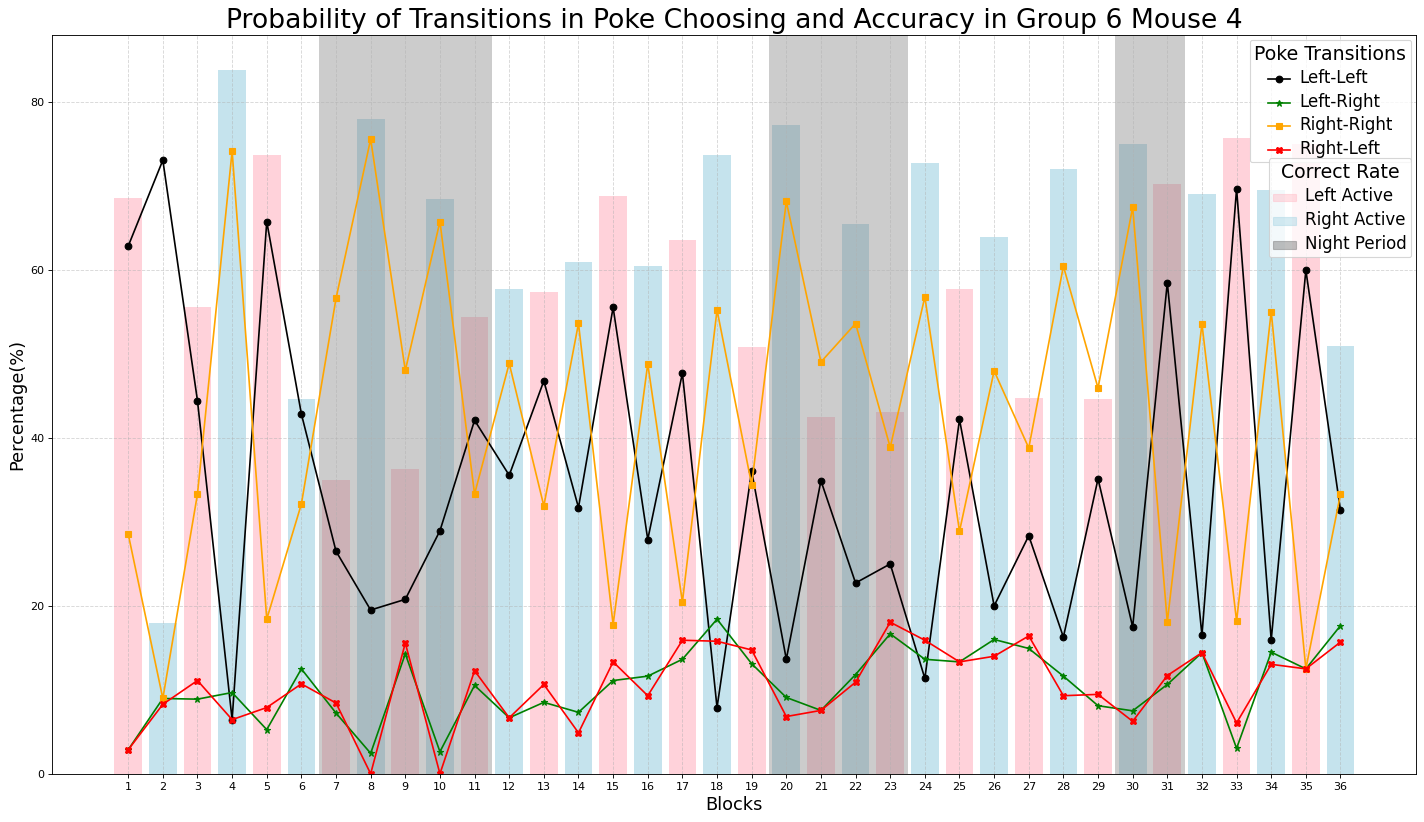

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B8M1.CSV


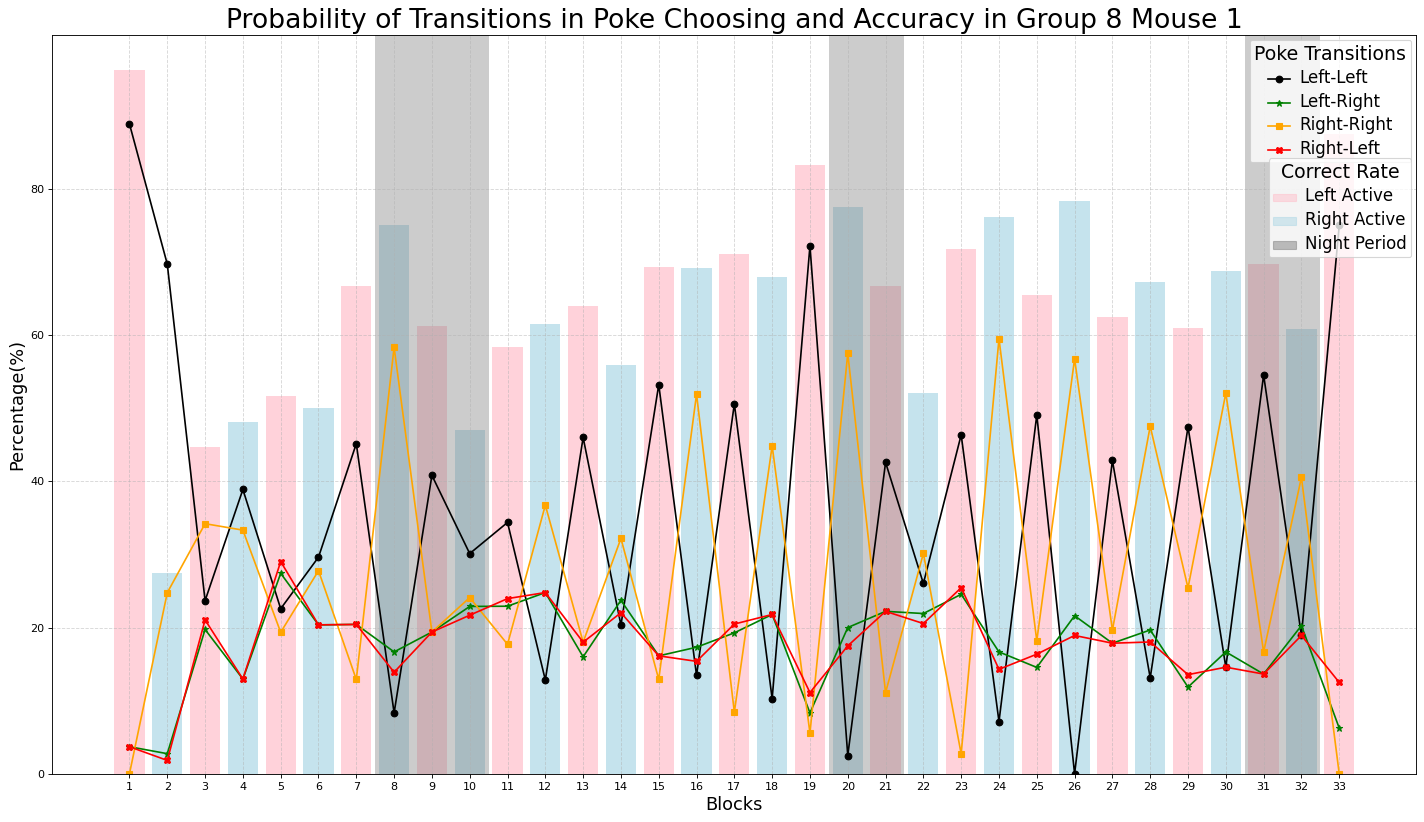

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B8M2.CSV


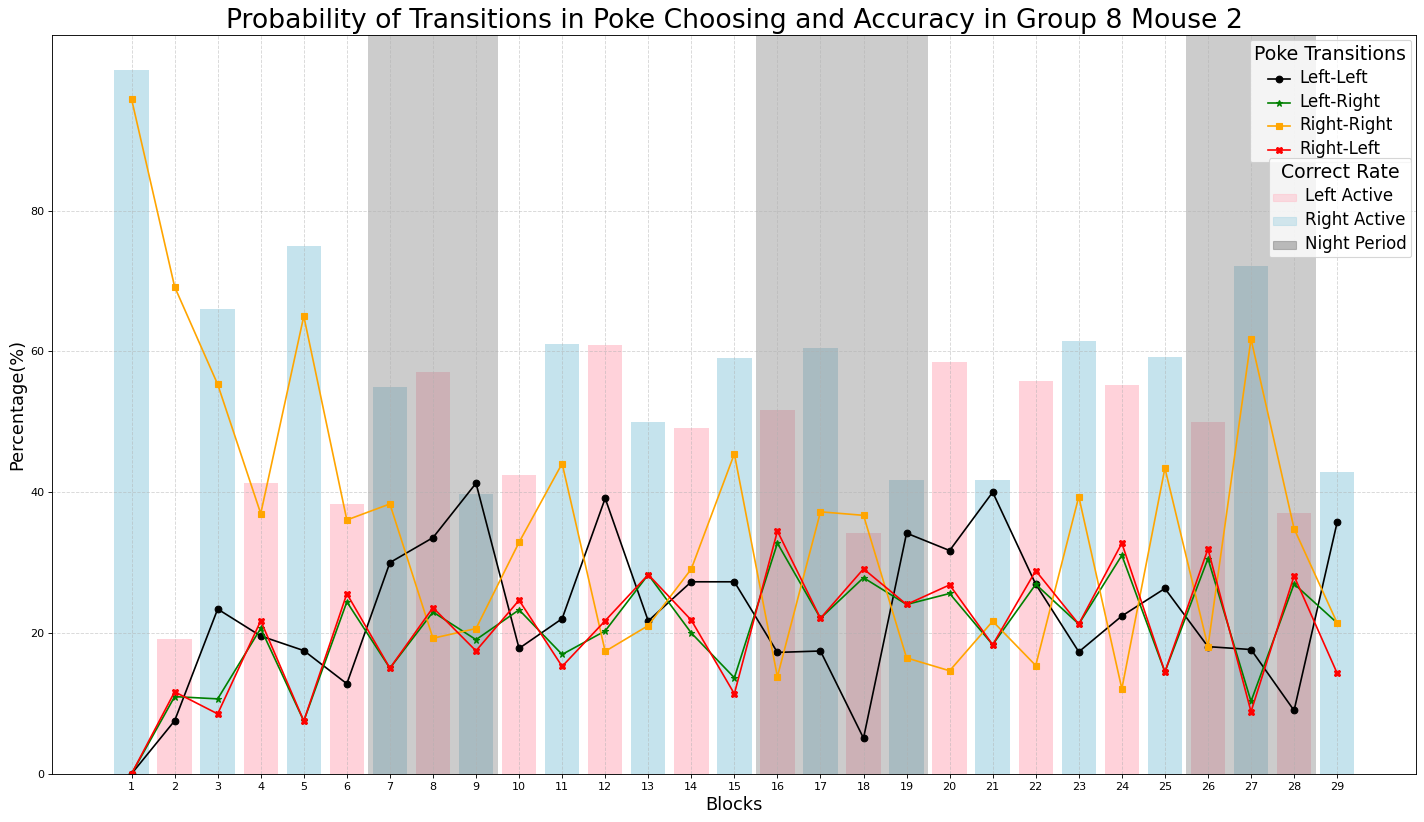

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B8M3.CSV


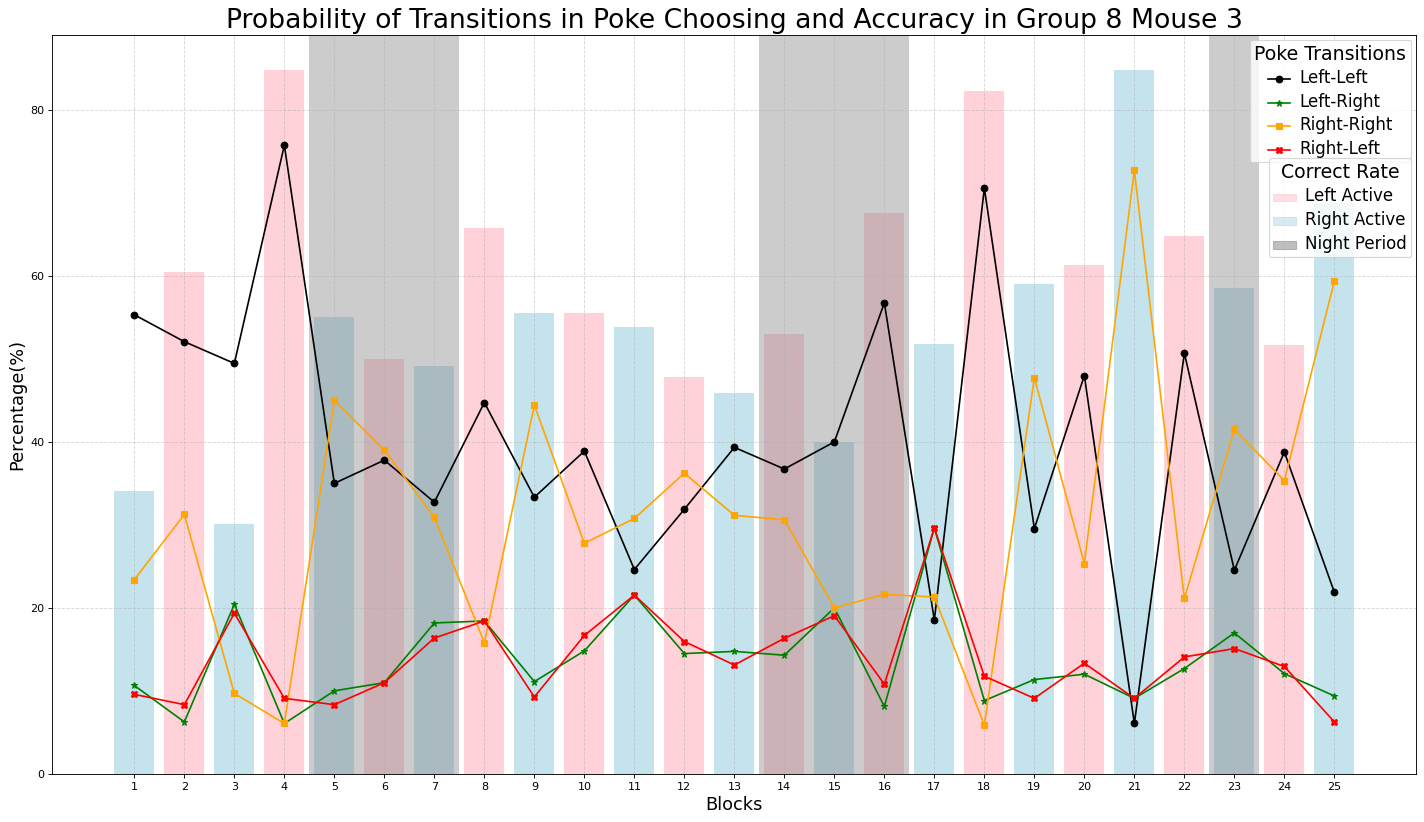

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B9M1.CSV


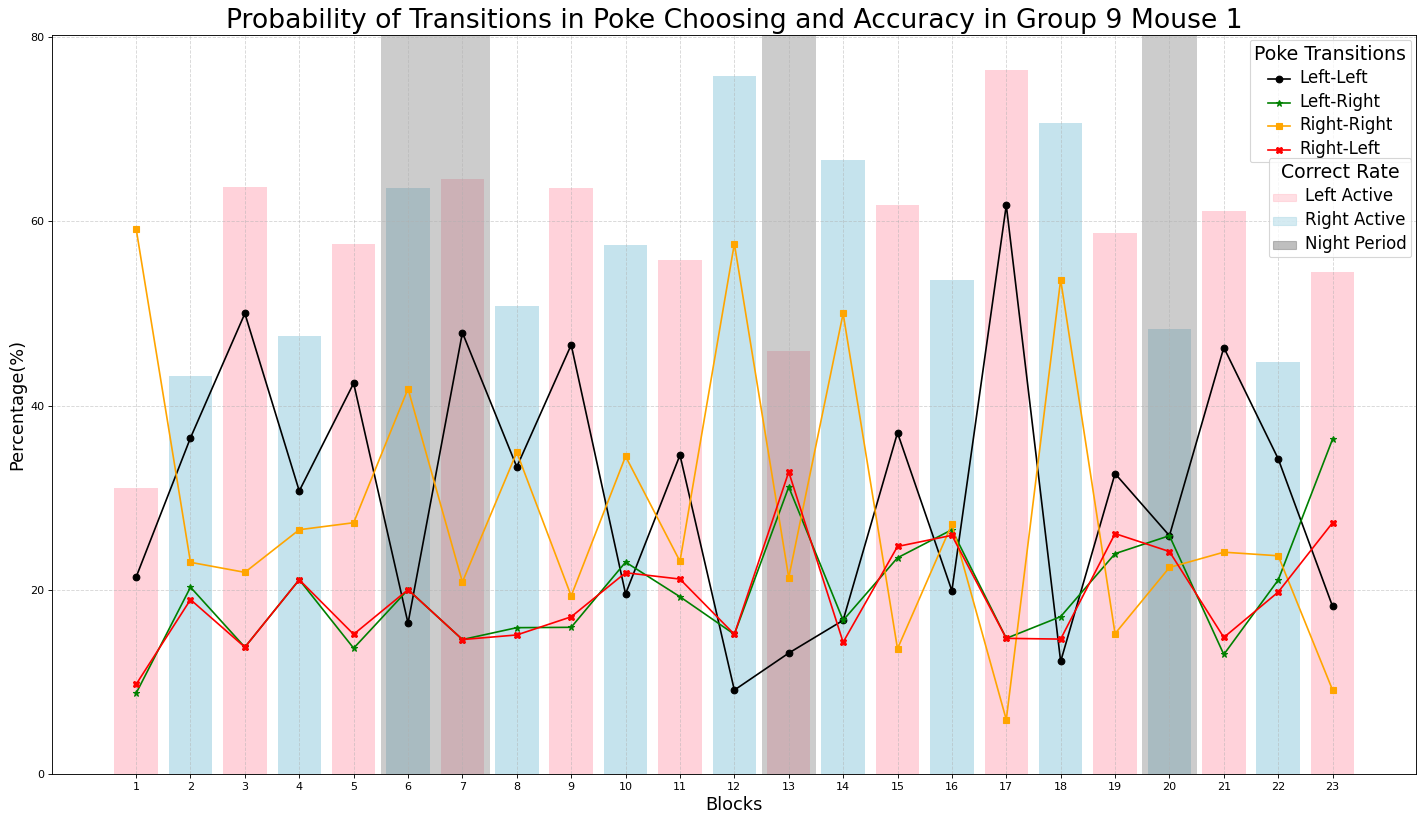

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B9M2.CSV


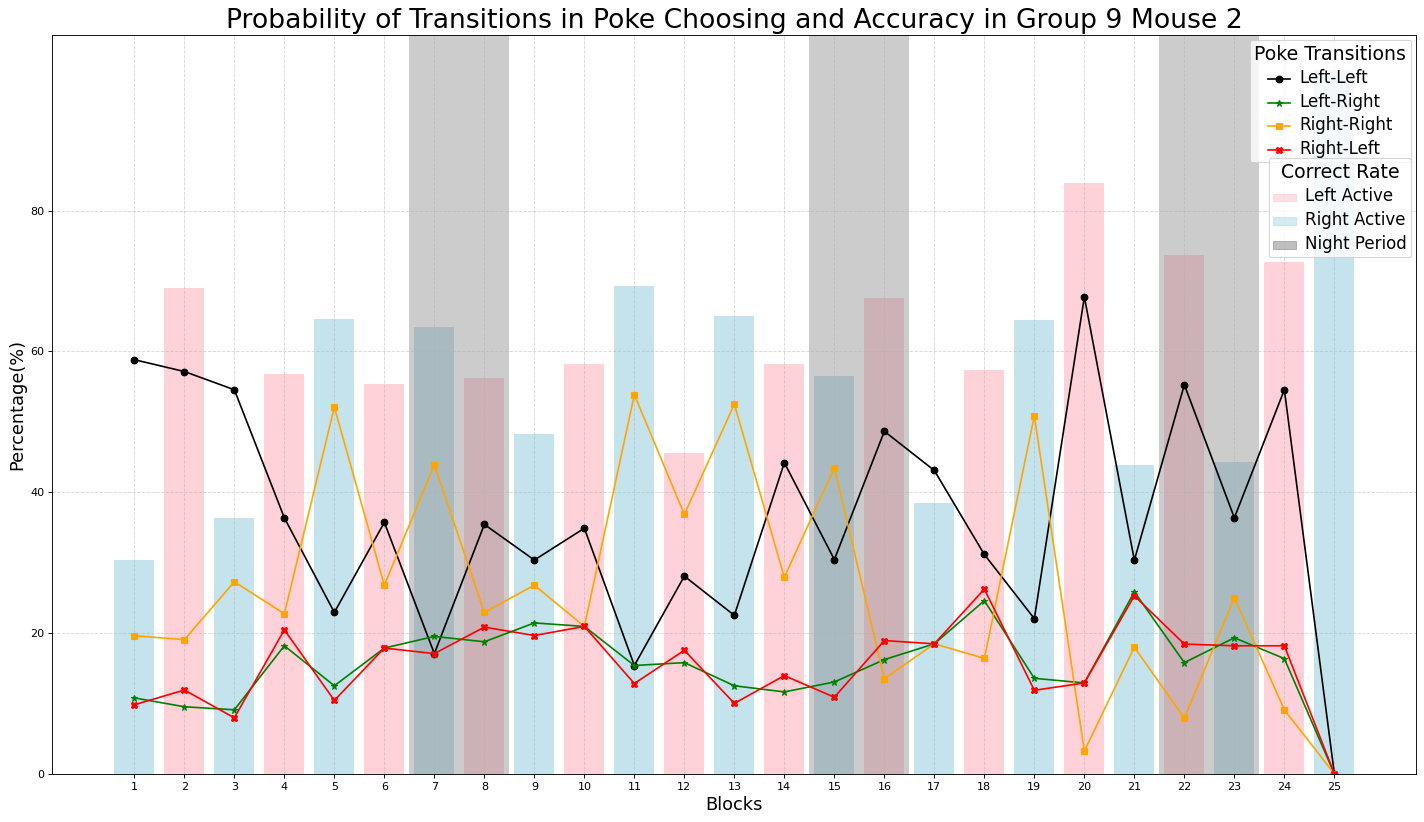

In [3]:
cask_scores = []

for path in paths.contigency_flip_cask:
    print(path)
    data_dropped = read_csv_clean(path=path)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_stats(data_stats, blocks, path)
    acc, grad = dit.block_cumulative_acc(blocks, normalize=True, grad=True)
    cask_scores.append(sum(grad))

In [4]:
print(ctrl_scores)
print(cask_scores)

[-0.05839727195225913, -0.07045403712815923, -0.04004583053878824, -0.1416896355602223, -0.11173112468121943, -0.13042767341303002]
[-0.19590112489740746, -0.23248161358542974, -0.20788698677321582, -0.17974830030377553, -0.20955043438415577, -0.3352853145943132, -0.20433436532507737, -0.0386684220425052, 0.002126952475905608, -0.053431205189484465, -0.10892635314995566, 0.11359358218779952, 0.16673970201577565, 0.12909933343533853]


In [5]:
import intervals as invs

In [6]:
import numpy as np

print(np.mean(ctrl_scores), np.std(ctrl_scores))
print(np.mean(cask_scores), np.std(cask_scores))

-0.09212426221227972 0.03792004345412661
-0.09676103929503578 0.14845529930332957


In [7]:
invs.MannWhitneyUTest(ctrl_scores, cask_scores, test_side='greater')

P Value is  0.6409700722394222
There is no significant difference between the two groups.


* In flipping poke case, we find that there is left or right stage (mice display a tendency to stick to one direction)
* there is only one stage at a time, and transition can take some times (1-2 stage to move to another)
* Generally, the accuracy is improved (>50~60% at the end and higher than the beginning)